In [1]:
#nltk.download()

In [2]:
import pandas as pd
import nltk
import re

In [3]:
f_data = pd.read_csv('remove_dup_nan.csv')
f_data
# Bộ dữ liệu cơ bản được crawling

,Unnamed: 0,name,category,description,time,URL,priceLow,priceHigh,reviews,adress,rating
0,0,Veteran Restaurant,"Steakhouse, Barbecue, Asian",Xin Chao. We are Stone Grill Barbecue Restaura...,"['Sun:5:00 PM - 12:00 AM', 'Mon:5:00 PM - 12:0...",https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,"['Terrible service. We came there many times, ...","8 Duong Dinh Nghe, Da Nang 550000 Vietnam",4.0
1,1,Cardi Pizzeria Bach Dang,"American, Steakhouse, Brew Pub",Premium Steak & Pizza Certified Imported Steak...,"['Sun:12:00 AM - 11:59 PM', 'Mon:12:00 AM - 11...",https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,['I came in for pizza because they look like t...,"124 Bạch Đằng, Hải Châu, Đà Nẵng, Da Nang Vietnam",5.0
2,2,Ca Chuon Co Vietnamese - Seafood Restaurant.,"Cafe, International, Asian","Ca Chuon Co, ('flying fish') a modern stylish ...","['Sun:06:00 AM - 10:00 PM', 'Mon:06:00 AM - 10...",https://www.tripadvisor.com//Restaurant_Review...,"₩12,953","₩38,860","[""I was looking for some decent seafoods resta...",99 Vo Nguyen Giap Street Ngu Hanh Son District...,5.0
3,3,Bistecca Restaurant Danang,"Italian, Southwestern, European",Bistecca – Italian restaurant offering the ori...,"['Sun:06:00 AM - 10:00 PM', 'Mon:06:00 AM - 10...",https://www.tripadvisor.com//Restaurant_Review...,"₩3,886","₩64,767",['Beautiful dinner and great service! All meal...,"20 Dong Da 7F New Orient Hotel, Thuan Phuoc Wa...",5.0
4,4,3 Big - Nướng & Lẩu,"Pizza, Barbecue, Korean",3 BiG - Nướng & Lẩu Nhà hàng BBQ - Thịt nướng ...,"['Sun:11:00 AM - 11:00 PM', 'Mon:11:00 AM - 10...",https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,['Great service. Good price and good food. The...,"134 Phan Châu Trinh, Phước Ninh, Hải Châu, Đà ...",5.0
...,...,...,...,...,...,...,...,...,...,...,...
1012,1117,SOHO Buffet & Alacarte Restaurant,"Japanese, Seafood, Barbecue",As the world of food up to nearly 300 dishes i...,"['Sun:10:30 AM - 2:00 PM:5:30 PM - 10:00 PM', ...",https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,['Staff need to improve the service & english ...,"Lot 1, Street 2/9, Da Nang 550000 Vietnam",2.5
1013,1119,East West Brewing Co. – Da Nang,"American, Seafood, International, Vietnamese",NaN,"['Sun:09:00 AM - 11:00 PM', 'Mon:09:00 AM - 11...",https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,['The service was terrible and the food was ev...,"1A Võ Nguyên Giáp, Phước Mỹ, Sơn Trà, Đà Nẵng,...",2.0
1014,1124,Danang Tower Steakhouse & Soju Bar,"Steakhouse, Seafood, Asian",From the mouthwatering seafood to the tender g...,NaN,https://www.tripadvisor.com//Restaurant_Review...,"₩11,654","₩87,403","[""Nice view. The first time I have been here w...","Đ. Trần Hưng Đạo 37/F, Vinpearl Condotel River...",1.5
1015,1127,Burger King,"Quick Bites, Fast Food",NaN,NaN,https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,['This Burger King is outrageously expensive a...,"Da Nang Airport Hai Chau Dist, Da Nang Vietnam",2.0


In [4]:
review_data = f_data['reviews']
review_data

0       ['Terrible service. We came there many times, ...
1       ['I came in for pizza because they look like t...
2       ["I was looking for some decent seafoods resta...
3       ['Beautiful dinner and great service! All meal...
4       ['Great service. Good price and good food. The...
                              ...                        
1012    ['Staff need to improve the service & english ...
1013    ['The service was terrible and the food was ev...
1014    ["Nice view. The first time I have been here w...
1015    ['This Burger King is outrageously expensive a...
1016    ['I really love food here. I will come back he...
Name: reviews, Length: 1017, dtype: object

In [5]:
# giá chưa tính toán
review_data.isnull().sum()
ex_data = review_data[1]

In [6]:
cleand_content = re.sub(r"[ㄱ-ㅣ가-힣]",'',ex_data) 
cleand_content = re.sub('[^\w\d\s]','',cleand_content)

print(cleand_content)

I came in for pizza because they look like they have a great diversity but then i saw some blackink squid pasta and i never had any It was delicious The pizza and the service were very good However we didnt like the pasta carbonara Prices were average for Da Nang after shopping at vincom plazait was a bit latei knew cardi pizza still opened and its location very close to my hotelso i came here for late dinneri ordered pizza bon loai pho maiit is four cheese pizzai also ordered mango smoothie and panna cottaas dessertall are tastyas a cheese loveri love four cheese pizzait is italian stylevery tasty the mango smoothie is thick and fresh panna cotta is my first try it comes with kiwi sauce special experience staffs here attentive and friendlythe place is quite  bigand that time already lateso only me one customervery memorable experience if have chance will come again to try other pizza there are lots of pizza to choose here highly recommendedMore Very friendlyand accommodating staff cou

In [7]:
cleand_content = cleand_content.lower()
cleand_content
# biến đổi chữ thường

'i came in for pizza because they look like they have a great diversity but then i saw some blackink squid pasta and i never had any it was delicious the pizza and the service were very good however we didnt like the pasta carbonara prices were average for da nang after shopping at vincom plazait was a bit latei knew cardi pizza still opened and its location very close to my hotelso i came here for late dinneri ordered pizza bon loai pho maiit is four cheese pizzai also ordered mango smoothie and panna cottaas dessertall are tastyas a cheese loveri love four cheese pizzait is italian stylevery tasty the mango smoothie is thick and fresh panna cotta is my first try it comes with kiwi sauce special experience staffs here attentive and friendlythe place is quite  bigand that time already lateso only me one customervery memorable experience if have chance will come again to try other pizza there are lots of pizza to choose here highly recommendedmore very friendlyand accommodating staff co

In [8]:
word_tokens = nltk.word_tokenize(cleand_content)

# len(word_tokens)
print(word_tokens)
# tiền xu

['i', 'came', 'in', 'for', 'pizza', 'because', 'they', 'look', 'like', 'they', 'have', 'a', 'great', 'diversity', 'but', 'then', 'i', 'saw', 'some', 'blackink', 'squid', 'pasta', 'and', 'i', 'never', 'had', 'any', 'it', 'was', 'delicious', 'the', 'pizza', 'and', 'the', 'service', 'were', 'very', 'good', 'however', 'we', 'didnt', 'like', 'the', 'pasta', 'carbonara', 'prices', 'were', 'average', 'for', 'da', 'nang', 'after', 'shopping', 'at', 'vincom', 'plazait', 'was', 'a', 'bit', 'latei', 'knew', 'cardi', 'pizza', 'still', 'opened', 'and', 'its', 'location', 'very', 'close', 'to', 'my', 'hotelso', 'i', 'came', 'here', 'for', 'late', 'dinneri', 'ordered', 'pizza', 'bon', 'loai', 'pho', 'maiit', 'is', 'four', 'cheese', 'pizzai', 'also', 'ordered', 'mango', 'smoothie', 'and', 'panna', 'cottaas', 'dessertall', 'are', 'tastyas', 'a', 'cheese', 'loveri', 'love', 'four', 'cheese', 'pizzait', 'is', 'italian', 'stylevery', 'tasty', 'the', 'mango', 'smoothie', 'is', 'thick', 'and', 'fresh', 'pan

In [9]:
tokens_pos = nltk.pos_tag(word_tokens)

print(tokens_pos)
# thao tác hình thái nguyên tố

[('i', 'NN'), ('came', 'VBD'), ('in', 'IN'), ('for', 'IN'), ('pizza', 'NN'), ('because', 'IN'), ('they', 'PRP'), ('look', 'VBP'), ('like', 'IN'), ('they', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('great', 'JJ'), ('diversity', 'NN'), ('but', 'CC'), ('then', 'RB'), ('i', 'VB'), ('saw', 'VBD'), ('some', 'DT'), ('blackink', 'NN'), ('squid', 'NN'), ('pasta', 'NN'), ('and', 'CC'), ('i', 'NN'), ('never', 'RB'), ('had', 'VBD'), ('any', 'DT'), ('it', 'PRP'), ('was', 'VBD'), ('delicious', 'JJ'), ('the', 'DT'), ('pizza', 'NN'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('were', 'VBD'), ('very', 'RB'), ('good', 'JJ'), ('however', 'RB'), ('we', 'PRP'), ('didnt', 'VBP'), ('like', 'IN'), ('the', 'DT'), ('pasta', 'NN'), ('carbonara', 'NN'), ('prices', 'NNS'), ('were', 'VBD'), ('average', 'JJ'), ('for', 'IN'), ('da', 'NN'), ('nang', 'NN'), ('after', 'IN'), ('shopping', 'VBG'), ('at', 'IN'), ('vincom', 'NN'), ('plazait', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('bit', 'NN'), ('latei', 'JJ'), ('knew', '

In [10]:
# chỉ trích danh từ
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)
        
print(NN_words)

['i', 'pizza', 'diversity', 'blackink', 'squid', 'pasta', 'i', 'pizza', 'service', 'pasta', 'carbonara', 'prices', 'da', 'nang', 'vincom', 'plazait', 'bit', 'pizza', 'location', 'hotelso', 'i', 'dinneri', 'bon', 'loai', 'pho', 'maiit', 'cheese', 'pizzai', 'smoothie', 'panna', 'cottaas', 'dessertall', 'loveri', 'pizzait', 'stylevery', 'mango', 'smoothie', 'panna', 'cotta', 'kiwi', 'experience', 'staffs', 'place', 'bigand', 'time', 'customervery', 'experience', 'chance', 'pizza', 'lots', 'pizza', 'staff', 'food', 'taste', 'service', 'food', 'location', 'food', 'pizza', 'steak', 'restaurant', 'options', 'service', 'food', 'staff', 'nnice', 'market', 'visit', 'nothing', 'pizzas', 'tea', 'food', 'staff', 'welcoming', 'problem', 'thanks', 'experience', 'love', 'staff', 'heart', 'amazing', 'food', 'place', 'pizza', 'pasta', 'whole', 'vietnam', 'staff', 'communication', 'language', 'barrier', 'pizza', 'staff', 'i', 'everything', 'i', 'location', 'dragon', 'bridgemore', 'food', 'service', 'staf

In [11]:
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []

for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

# len(lemmatized_words)
print(lemmatized_words)

['i', 'pizza', 'diversity', 'blackink', 'squid', 'pasta', 'i', 'pizza', 'service', 'pasta', 'carbonara', 'price', 'da', 'nang', 'vincom', 'plazait', 'bit', 'pizza', 'location', 'hotelso', 'i', 'dinneri', 'bon', 'loai', 'pho', 'maiit', 'cheese', 'pizzai', 'smoothie', 'panna', 'cottaas', 'dessertall', 'loveri', 'pizzait', 'stylevery', 'mango', 'smoothie', 'panna', 'cotta', 'kiwi', 'experience', 'staff', 'place', 'bigand', 'time', 'customervery', 'experience', 'chance', 'pizza', 'lot', 'pizza', 'staff', 'food', 'taste', 'service', 'food', 'location', 'food', 'pizza', 'steak', 'restaurant', 'option', 'service', 'food', 'staff', 'nnice', 'market', 'visit', 'nothing', 'pizza', 'tea', 'food', 'staff', 'welcoming', 'problem', 'thanks', 'experience', 'love', 'staff', 'heart', 'amazing', 'food', 'place', 'pizza', 'pasta', 'whole', 'vietnam', 'staff', 'communication', 'language', 'barrier', 'pizza', 'staff', 'i', 'everything', 'i', 'location', 'dragon', 'bridgemore', 'food', 'service', 'staff', '

In [12]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

#len(stopwords_list)
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# thao tác tiêu chuẩn hoá
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words:
            final_NN_words.remove(word)

print(final_NN_words)

['pizza', 'diversity', 'blackink', 'squid', 'pasta', 'pizza', 'service', 'pasta', 'carbonara', 'price', 'da', 'nang', 'vincom', 'plazait', 'bit', 'pizza', 'location', 'hotelso', 'dinneri', 'bon', 'loai', 'pho', 'maiit', 'cheese', 'pizzai', 'smoothie', 'panna', 'cottaas', 'dessertall', 'loveri', 'pizzait', 'stylevery', 'mango', 'smoothie', 'panna', 'cotta', 'kiwi', 'experience', 'staff', 'place', 'bigand', 'time', 'customervery', 'experience', 'chance', 'pizza', 'lot', 'pizza', 'staff', 'food', 'taste', 'service', 'food', 'location', 'food', 'pizza', 'steak', 'restaurant', 'option', 'service', 'food', 'staff', 'nnice', 'market', 'visit', 'nothing', 'pizza', 'tea', 'food', 'staff', 'welcoming', 'problem', 'thanks', 'experience', 'love', 'staff', 'heart', 'amazing', 'food', 'place', 'pizza', 'pasta', 'whole', 'vietnam', 'staff', 'communication', 'language', 'barrier', 'pizza', 'staff', 'everything', 'location', 'dragon', 'bridgemore', 'food', 'service', 'staff', 'place', 'food', 'kid', 'e

In [14]:
# tần số
from collections import Counter
c = Counter(final_NN_words)

print(c)

Counter({'pizza': 252, 'food': 160, 'staff': 123, 'service': 103, 'view': 79, 'restaurant': 68, 'place': 55, 'river': 54, 'pasta': 40, 'steak': 40, 'location': 33, 'da': 30, 'nang': 24, 'price': 22, 'experience': 20, 'taste': 20, 'time': 19, 'family': 17, 'everything': 15, 'beer': 15, 'friend': 15, 'han': 15, 'menu': 14, 'drink': 14, 'market': 13, 'option': 12, 'spaghetti': 12, 'salad': 11, 'carbonara': 10, 'bit': 10, 'floor': 10, 'dinner': 10, 'waiter': 10, 'kind': 10, 'danang': 10, 'meal': 10, 'anna': 10, 'night': 10, 'cardi': 9, 'visit': 8, 'soup': 8, 'care': 8, 'pizzeria': 8, 'lot': 7, 'vietnam': 7, 'dragon': 7, 'choice': 7, 'area': 7, 'people': 7, 'spot': 7, 'beef': 7, 'street': 7, 'waitress': 7, 'server': 7, 'day': 7, 'table': 6, 'lunch': 6, 'bridge': 6, 'bread': 6, 'order': 6, 'city': 6, 'cocktail': 6, 'quality': 6, 'bao': 6, 'thanks': 5, 'recommend': 5, 'home': 5, 'cheese': 4, 'smoothie': 4, 'panna': 4, 'chance': 4, 'nothing': 4, 'love': 4, 'heart': 4, 'tenderloin': 4, 'penne':

In [15]:
# final_NN_words[1]
doc_noun = []
for i in range(0,len(final_NN_words)):
    doc_noun.append(''.join(final_NN_words[i])) 

#Liên kết các danh từ của mỗi văn bản thành str [[Tài liệu 1 Danh từ, Tài liệu 2 Danh từ,...]]

In [16]:
doc_noun

['pizza',
 'diversity',
 'blackink',
 'squid',
 'pasta',
 'pizza',
 'service',
 'pasta',
 'carbonara',
 'price',
 'da',
 'nang',
 'vincom',
 'plazait',
 'bit',
 'pizza',
 'location',
 'hotelso',
 'dinneri',
 'bon',
 'loai',
 'pho',
 'maiit',
 'cheese',
 'pizzai',
 'smoothie',
 'panna',
 'cottaas',
 'dessertall',
 'loveri',
 'pizzait',
 'stylevery',
 'mango',
 'smoothie',
 'panna',
 'cotta',
 'kiwi',
 'experience',
 'staff',
 'place',
 'bigand',
 'time',
 'customervery',
 'experience',
 'chance',
 'pizza',
 'lot',
 'pizza',
 'staff',
 'food',
 'taste',
 'service',
 'food',
 'location',
 'food',
 'pizza',
 'steak',
 'restaurant',
 'option',
 'service',
 'food',
 'staff',
 'nnice',
 'market',
 'visit',
 'nothing',
 'pizza',
 'tea',
 'food',
 'staff',
 'welcoming',
 'problem',
 'thanks',
 'experience',
 'love',
 'staff',
 'heart',
 'amazing',
 'food',
 'place',
 'pizza',
 'pasta',
 'whole',
 'vietnam',
 'staff',
 'communication',
 'language',
 'barrier',
 'pizza',
 'staff',
 'everything',


In [17]:
#Biến tập hợp văn bản thành chuỗi tf-idf từ vựng
#Chỉ xem xét các từ xuất hiện trong tài liệu từ 1% đến 95%.

from sklearn.feature_extraction.text import TfidfVectorizer   
vec = TfidfVectorizer(min_df = 0.01, max_df=0.95)   

X = vec.fit_transform(doc_noun)

In [18]:
print(X)

  (0, 5)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 9)	1.0
  (7, 4)	1.0
  (10, 0)	1.0
  (11, 3)	1.0
  (15, 5)	1.0
  (16, 2)	1.0
  (38, 10)	1.0
  (39, 6)	1.0
  (45, 5)	1.0
  (47, 5)	1.0
  (48, 10)	1.0
  (49, 1)	1.0
  (51, 9)	1.0
  (52, 1)	1.0
  (53, 2)	1.0
  (54, 1)	1.0
  (55, 5)	1.0
  (56, 11)	1.0
  (57, 7)	1.0
  (59, 9)	1.0
  (60, 1)	1.0
  (61, 10)	1.0
  :	:
  (2327, 8)	1.0
  (2328, 10)	1.0
  (2329, 5)	1.0
  (2331, 12)	1.0
  (2332, 10)	1.0
  (2333, 9)	1.0
  (2337, 5)	1.0
  (2338, 12)	1.0
  (2340, 5)	1.0
  (2343, 10)	1.0
  (2345, 1)	1.0
  (2348, 10)	1.0
  (2349, 9)	1.0
  (2350, 0)	1.0
  (2351, 3)	1.0
  (2355, 6)	1.0
  (2365, 5)	1.0
  (2371, 2)	1.0
  (2372, 5)	1.0
  (2373, 11)	1.0
  (2374, 9)	1.0
  (2375, 5)	1.0
  (2380, 12)	1.0
  (2381, 5)	1.0
  (2383, 10)	1.0


/Users/baehyeli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baehyeli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


1
2
3


/Users/baehyeli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baehyeli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


4
5
6
7
8
9


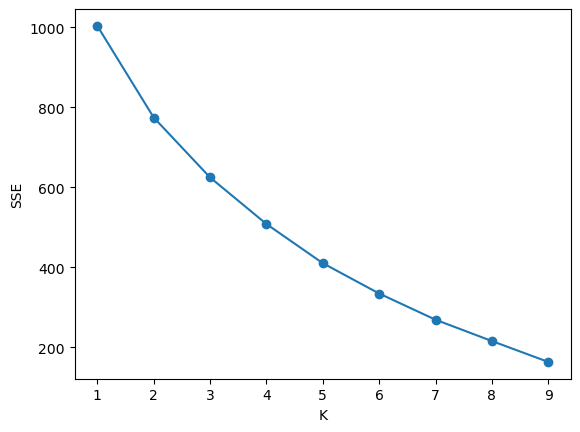

In [19]:
# cái này không cần để ý cũng được

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def elbow(X):
    sse = []

    for i in range(1,10):
        km = KMeans(n_clusters=i, algorithm='auto', random_state=0)  #k-means algorithm: auto(기본값))
        km.fit(X)
        sse.append(km.inertia_)
        print(i)
        
    plt.plot(range(1,10), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.xticks(range(1,10))
    plt.show()

elbow(X)

In [20]:
from collections import Counter #Sử dụng để tổng hợp từ vựng một cách dễ dàng
count = Counter(doc_noun)
hund0 = dict(count.most_common()) #Xuất ra 50 cái hàng đầu ra
hund0

{'pizza': 252,
 'food': 160,
 'staff': 123,
 'service': 103,
 'view': 79,
 'restaurant': 68,
 'place': 55,
 'river': 54,
 'pasta': 40,
 'steak': 40,
 'location': 33,
 'da': 30,
 'nang': 24,
 'price': 22,
 'experience': 20,
 'taste': 20,
 'time': 19,
 'family': 17,
 'everything': 15,
 'beer': 15,
 'friend': 15,
 'han': 15,
 'menu': 14,
 'drink': 14,
 'market': 13,
 'option': 12,
 'spaghetti': 12,
 'salad': 11,
 'carbonara': 10,
 'bit': 10,
 'floor': 10,
 'dinner': 10,
 'waiter': 10,
 'kind': 10,
 'danang': 10,
 'meal': 10,
 'anna': 10,
 'night': 10,
 'cardi': 9,
 'visit': 8,
 'soup': 8,
 'care': 8,
 'pizzeria': 8,
 'lot': 7,
 'vietnam': 7,
 'dragon': 7,
 'choice': 7,
 'area': 7,
 'people': 7,
 'spot': 7,
 'beef': 7,
 'street': 7,
 'waitress': 7,
 'server': 7,
 'day': 7,
 'table': 6,
 'lunch': 6,
 'bridge': 6,
 'bread': 6,
 'order': 6,
 'city': 6,
 'cocktail': 6,
 'quality': 6,
 'bao': 6,
 'thanks': 5,
 'recommend': 5,
 'home': 5,
 'cheese': 4,
 'smoothie': 4,
 'panna': 4,
 'chance': 4,


In [21]:
count = Counter(doc_noun)
hund1 = dict(count.most_common(30))
hund1

{'pizza': 252,
 'food': 160,
 'staff': 123,
 'service': 103,
 'view': 79,
 'restaurant': 68,
 'place': 55,
 'river': 54,
 'pasta': 40,
 'steak': 40,
 'location': 33,
 'da': 30,
 'nang': 24,
 'price': 22,
 'experience': 20,
 'taste': 20,
 'time': 19,
 'family': 17,
 'everything': 15,
 'beer': 15,
 'friend': 15,
 'han': 15,
 'menu': 14,
 'drink': 14,
 'market': 13,
 'option': 12,
 'spaghetti': 12,
 'salad': 11,
 'carbonara': 10,
 'bit': 10}

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

tfidf_data = TfidfVectorizer().fit(doc_noun)

In [23]:
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(tfidf_data.transform(doc_noun).toarray())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
tfidf_matrix = tfidf_data.fit_transform(doc_noun)

In [25]:
tfidf_matrix

<2384x583 sparse matrix of type '<class 'numpy.float64'>'
	with 2378 stored elements in Compressed Sparse Row format>

In [26]:
tfidf_data = TfidfVectorizer(max_features=2500)
tdm_data = tfidf_data.fit_transform(doc_noun)

In [27]:
word_count_60 = pd.DataFrame({
    'word': tfidf_data.get_feature_names_out(),
    'frequency': tdm_data.sum(axis=0).flat
})

In [28]:
#Rút ra từ khóa cho một nhà hàng ngon
word_count_60.sort_values('frequency',ascending=False).head(20)

,word,frequency
365,pizza,252.0
192,food,160.0
475,staff,123.0
444,service,103.0
550,view,79.0
410,restaurant,68.0
372,place,55.0
420,river,54.0
482,steak,40.0
352,pasta,40.0
